# !pip3 install opencv-python

# !pip install tensorflow-gpu

# !pip3 install tensorflow

In [4]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
import random
import os
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [154]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Data Aquisition

In [54]:
# Create a function to get an overview of contents inside the main directory

def dir_overview(directory_path):
    """
    Gives an overview of all the inside directories and files within 
    it(directory_path)and gives the total number of overall images.

    Args:
      directory_path (str): Main(target) directory

    Returns:
      A print out of:
          number of subdirectories in the dir_path
          number of images in each subdir
          name of each subdir
          total number of overall images
    """  
    image_count = 0
    for dirpath, dirnames, filenames in os.walk(directory_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
        image_count += len(filenames)
    print(f"\nTotal number of images in the {directory_path}: {image_count}")


In [55]:
# Overview of dataset  
dataset = "Reduced_Dataset"
dir_overview(dataset)

There are 3 directories and 0 images in './Dataset/Reduced_Dataset/'.
There are 50 directories and 0 images in './Dataset/Reduced_Dataset/testing_set'.
There are 0 directories and 16 images in './Dataset/Reduced_Dataset/testing_set\ALBERTS TOWHEE'.
There are 0 directories and 16 images in './Dataset/Reduced_Dataset/testing_set\AMERICAN COOT'.
There are 0 directories and 15 images in './Dataset/Reduced_Dataset/testing_set\ANTBIRD'.
There are 0 directories and 15 images in './Dataset/Reduced_Dataset/testing_set\APOSTLEBIRD'.
There are 0 directories and 19 images in './Dataset/Reduced_Dataset/testing_set\AUCKLAND SHAQ'.
There are 0 directories and 16 images in './Dataset/Reduced_Dataset/testing_set\AZURE TIT'.
There are 0 directories and 15 images in './Dataset/Reduced_Dataset/testing_set\BAIKAL TEAL'.
There are 0 directories and 14 images in './Dataset/Reduced_Dataset/testing_set\BEARDED BELLBIRD'.
There are 0 directories and 14 images in './Dataset/Reduced_Dataset/testing_set\BLACK THRO

In [56]:
# Get the class names
main_directory = pathlib.Path("/Users/Supriya/Desktop/wisdom/Reduced_Dataset/training_set/")
class_names = np.array(sorted([item.name for item in main_directory.glob("*")]))

In [57]:
class_names

array(['ALBERTS TOWHEE', 'AMERICAN COOT', 'ANTBIRD', 'APOSTLEBIRD',
       'AUCKLAND SHAQ', 'AZURE TIT', 'BAIKAL TEAL', 'BEARDED BELLBIRD',
       'BLACK THROATED HUET', 'BLACK-NECKED GREBE', 'BLUE MALKOHA',
       'BREWERS BLACKBIRD', 'CINNAMON FLYCATCHER', 'COMMON POORWILL',
       'CRESTED COUA', 'EVENING GROSBEAK', 'GAMBELS QUAIL',
       'GREAT JACAMAR', 'GREY CUCKOOSHRIKE', 'GUINEA TURACO',
       'HIMALAYAN BLUETAIL', 'INDIAN VULTURE', 'INLAND DOTTEREL', 'IWI',
       'JAPANESE ROBIN', 'LITTLE AUK', 'MANGROVE CUCKOO', 'MOURNING DOVE',
       'NORTHERN MOCKINGBIRD', 'ORNATE HAWK EAGLE', 'PEREGRINE FALCON',
       'PLUSH CRESTED JAY', 'PURPLE SWAMPHEN', 'RED HEADED WOODPECKER',
       'RED LEGGED HONEYCREEPER', 'RED SHOULDERED HAWK', 'SATYR TRAGOPAN',
       'SNOWY OWL', 'SPOTTED CATBIRD', 'SPOTTED WHISTLING DUCK',
       'STRIPPED SWALLOW', 'SURF SCOTER', 'TAIWAN MAGPIE',
       'TURKEY VULTURE', 'VARIED THRUSH', 'VENEZUELIAN TROUPIAL',
       'VIOLET CUCKOO', 'VISAYAN HORNBILL',

In [58]:
len(class_names)

50

In [59]:
# Visualize image
def visualize_random_img(target_directory, target_class):
    """
    View's the random image from the given target directory and given target
    class.
    
    Args:
        target_directory (str): target directory
        target_class (str): Name of the subdirectory
    
    Returns:
        prints the name of the file
        prints the image shape
        Reutrns a random image from the directory
    """
    # Setup the target directory
    target_folder = target_directory + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read and plot the image
    image = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(image)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {image.shape}")
    
    return image

['091.jpg']
Image shape: (224, 224, 3)


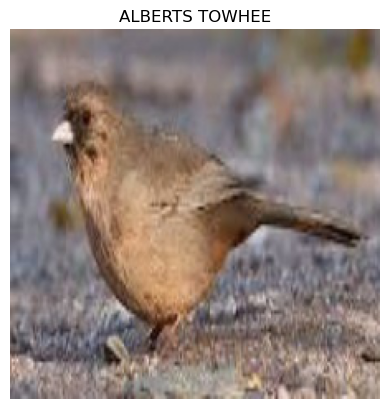

In [61]:
# Visualize a random image from the dataset
image = visualize_random_img("/Users/Supriya/Desktop/wisdom/Reduced_Dataset/training_set/", "ALBERTS TOWHEE")

In [62]:
# Create a function to visualize random images(15) inside the directory
def random_images(dataset_dir):
    """
    Plots 15 random images for the given directory(dataset_dir).
    
    Args:
        dataset_dir: Main Directory that contains subdirectories and 
                     image files inside subdirectories.
    Returns:
        Plots a random images from 15 random classes
    """
    # Path to your dataset directory containing bird images
    # dataset_dir = "./Dataset/train/"

    # Get a list of all lables in the dataset directory
    image_labels = [f for f in os.listdir(dataset_dir)]

    # Choose 15 random labels
    random_labels = random.choices(image_labels, k=min(15, len(image_labels)))


    # Plot the images
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))

    for i, ax in enumerate(axes.flatten()):
        # Choose random image from the random labels
        random_image_path = dataset_dir + random_labels[i]
        random_image = dataset_dir + random_labels[i] + "/" + random.choice(os.listdir(random_image_path))
        img = mpimg.imread(random_image)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(random_labels[i])

    plt.show()

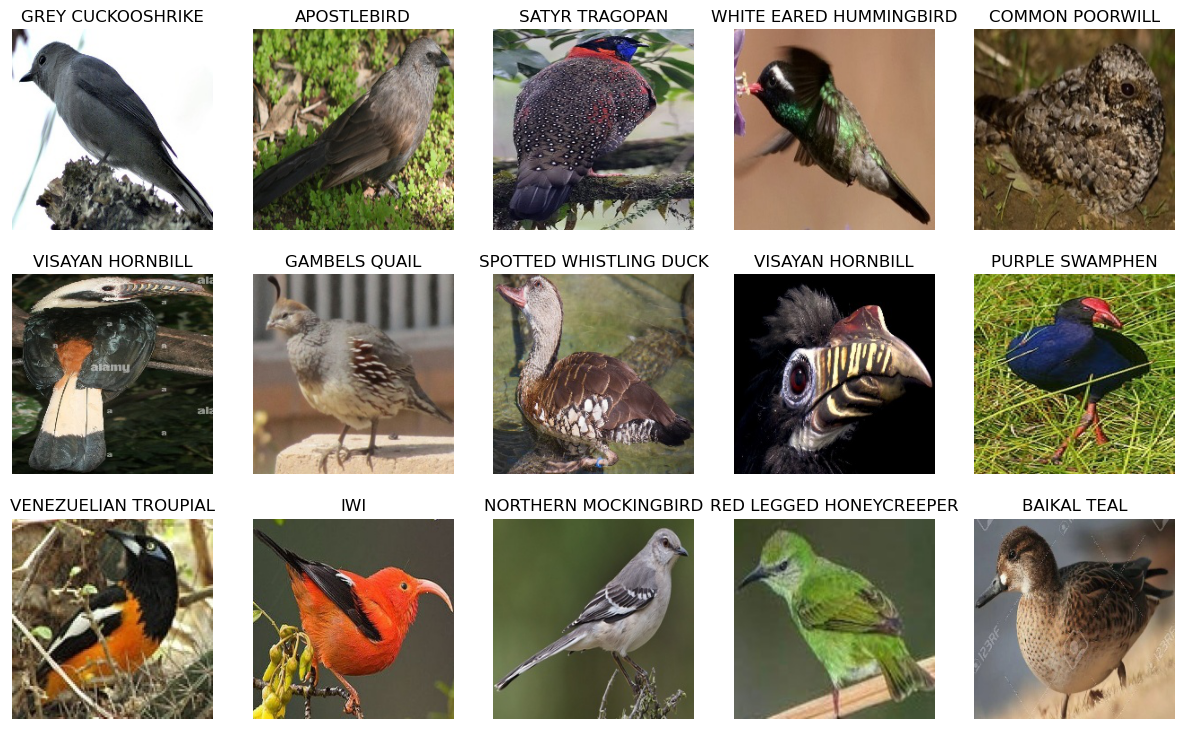

In [63]:
dataset_dir = "/Users/Supriya/Desktop/wisdom/Reduced_Dataset/training_set/""
random_images(dataset_dir)

In [64]:
# Create a funciton to visualize the number of images in random subdirectories
def plot_graph(main_dir):
    
    # Get a list of subdirectories
    sub_dirs = [subdir for subdir in pathlib.Path(main_dir).iterdir() if subdir.is_dir()]
    
    # Get random 20 subdirectories 
    random_subdirs = random.choices(sub_dirs, k=20)
    
    # Numbers of files in each random sub directory
    num_files = [len(list(random_subdir.glob("*"))) for random_subdir in random_subdirs]
    
    # Plot a bar chart
    plt.bar(range(len(random_subdirs)), num_files, tick_label=[subdir.name for subdir in random_subdirs])
    plt.xlabel('Subdirectories')
    plt.ylabel('Number of Files')
    plt.title('Number of Files in Each Subdirectory')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

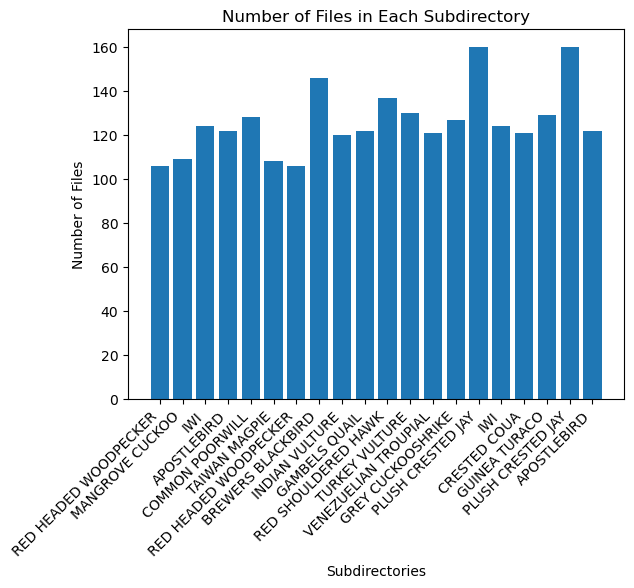

In [65]:
main_directory = "/Users/Supriya/Desktop/wisdom/Reduced_Dataset/training_set/"
plot_graph(main_directory)

### Building the model using CNN

In [66]:
img_path = "/Users/Supriya/Desktop/wisdom/Reduced_Dataset/training_set/ALBERTS TOWHEE/001.jpg"
img = mpimg.imread(img_path)

In [67]:
img

array([[[188, 175, 120],
        [184, 171, 116],
        [180, 169, 115],
        ...,
        [144, 127,  73],
        [145, 126,  68],
        [148, 129,  71]],

       [[188, 175, 120],
        [183, 170, 117],
        [179, 168, 114],
        ...,
        [145, 126,  70],
        [145, 126,  68],
        [149, 130,  71]],

       [[187, 174, 121],
        [181, 170, 116],
        [177, 166, 112],
        ...,
        [143, 124,  68],
        [145, 124,  67],
        [150, 130,  71]],

       ...,

       [[164, 133,  86],
        [166, 138,  91],
        [163, 136,  93],
        ...,
        [ 78,  69,  60],
        [ 65,  56,  47],
        [ 65,  56,  47]],

       [[149, 115,  70],
        [154, 121,  78],
        [151, 119,  78],
        ...,
        [ 86,  78,  67],
        [ 60,  52,  41],
        [ 59,  51,  40]],

       [[158, 120,  81],
        [167, 132,  92],
        [165, 131,  93],
        ...,
        [ 46,  38,  27],
        [ 39,  31,  20],
        [ 55,  47,  36]]

In [73]:
# Rescale the images using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Setup paths to our data directories
train_dir_path = "/Users/Supriya/Desktop/wisdom/Reduced_Dataset/training_set/""
test_dir_path = "/Users/Supriya/Desktop/wisdom/Reduced_Dataset/testing_set/"

# Preprocess data (get all the pixel values between 0 and 1(sclaing/Normalizing))

# Initialize the ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

# Create a generator for reading images and scaling them
batch_size = 8
train_generator = train_datagen.flow_from_directory(
    directory=train_dir_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=train_dir_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=test_dir_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)


Found 5166 images belonging to 50 classes.
Found 1269 images belonging to 50 classes.
Found 134 images belonging to 1 classes.


In [80]:
# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(50, activation='softmax')
])

# Compile our CNN 
model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_generator,
                       epochs=100,
                       steps_per_epoch=len(train_generator),
                       validation_data=valid_generator,
                       validation_steps=len(valid_generator))

Epoch 1/100
646/646 [==============================] - 337s 520ms/step - loss: 4.5612 - accuracy: 0.0312 - val_loss: 3.7792 - val_accuracy: 0.0433
Epoch 2/100
646/646 [==============================] - 335s 519ms/step - loss: 3.6612 - accuracy: 0.0925 - val_loss: 3.5144 - val_accuracy: 0.1182
Epoch 3/100
646/646 [==============================] - 335s 518ms/step - loss: 3.3310 - accuracy: 0.1601 - val_loss: 3.2254 - val_accuracy: 0.1883
Epoch 4/100
646/646 [==============================] - 333s 515ms/step - loss: 2.9799 - accuracy: 0.2313 - val_loss: 2.8458 - val_accuracy: 0.2656
Epoch 5/100
646/646 [==============================] - 332s 514ms/step - loss: 2.6895 - accuracy: 0.3117 - val_loss: 2.6952 - val_accuracy: 0.3160
Epoch 6/100
646/646 [==============================] - 333s 516ms/step - loss: 2.4690 - accuracy: 0.3469 - val_loss: 2.6347 - val_accuracy: 0.3483
Epoch 7/100
646/646 [==============================] - 347s 538ms/step - loss: 2.3603 - accuracy: 0.3748 - val_loss: 2

In [81]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 394272)            0         
                                                                 
 dense_7 (Dense)             (None, 128)               50466944  
                                                                 
 dense_8 (Dense)             (None, 50)                6450      
                                                                 
Total params: 50,474,290
Trainable params: 50,474,290
Non-trainable params: 0
__________________________________________

### Evaluating our model

In [84]:
score = model_1.evaluate_generator(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

C:\Users\Sam\AppData\Local\Temp\ipykernel_20500\488157943.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model_1.evaluate_generator(valid_generator)


Test loss: 2.8711252212524414
Test accuracy: 0.49566587805747986


In [86]:
predict=model_1.predict_generator(test_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)

C:\Users\Sam\AppData\Local\Temp\ipykernel_20500\3170131605.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict=model_1.predict_generator(test_generator)


In [87]:
y_classes

array([42, 47, 19, 33, 16, 31, 49, 46, 38, 28, 48, 12, 18, 49, 26, 31, 40,
       14, 45, 37, 35, 46, 45, 42, 24, 38,  1, 43, 48, 39, 48, 42, 10, 41,
       45, 44, 25, 32, 15, 44, 29, 45, 33,  6, 23, 31, 26, 48, 49, 42, 31,
       45, 41, 44, 19, 44, 16, 26, 30,  5, 47, 40, 42, 38,  7, 46, 45, 48,
       18, 49, 44, 19, 42, 35, 41, 29, 49, 46, 46,  7, 49, 42, 19, 24, 12,
       47, 49, 43, 48, 35, 48, 49, 44, 39, 14,  1, 49, 47, 47,  4, 14,  4,
       12, 44, 18, 36, 44, 28, 26,  5, 29, 41, 29, 41,  2, 48, 22, 41, 44,
       24, 11, 39, 41, 18, 31, 29, 21, 47, 29,  2,  4,  4, 47, 47],
      dtype=int64)

In [142]:
# Plot the Validation and training curves
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validaiton metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # Plot accuracy
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

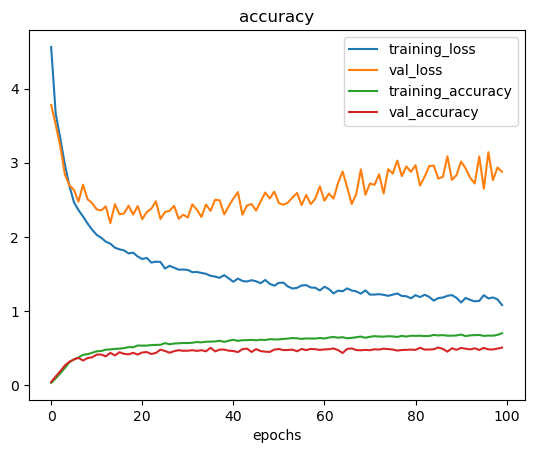

In [143]:
plot_loss_curves(history_1)

## Improving our model

In [94]:
# Augment the data for improving model performance

# Create an ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerators for validation and testing data without data augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the paths to your datasets
train_dir = '/Users/Supriya/Desktop/wisdom/Reduced_Dataset/training_set/'
validation_dir = '/Users/Supriya/Desktop/wisdom/Reduced_Dataset/validation_set/'
test_dir = '/Users/Supriya/Desktop/wisdom/Reduced_Dataset/testing_set/'

# Create generators for training, validation, and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None
)

Found 6435 images belonging to 50 classes.
Found 830 images belonging to 50 classes.
Found 134 images belonging to 1 classes.


In [98]:
# Build an improved CNN model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(50, activation='softmax', kernel_regularizer=l2(0.01))
])

# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [99]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_9 (Batc  (None, 222, 222, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 batch_normalization_10 (Bat  (None, 109, 109, 128)    512       
 chNormalization)                                                
                                                      

In [104]:
# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0:
        return lr * 0.9
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

# Fit the improved model
history_2 = model_2.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[lr_schedule]  # Add the learning rate scheduler callback
)

Epoch 1/100
202/202 [==============================] - 926s 5s/step - loss: 15.1466 - accuracy: 0.1116 - val_loss: 9.1216 - val_accuracy: 0.0253 - lr: 8.1000e-04
Epoch 2/100
202/202 [==============================] - 928s 5s/step - loss: 7.7699 - accuracy: 0.1655 - val_loss: 7.9982 - val_accuracy: 0.0904 - lr: 8.1000e-04
Epoch 3/100
202/202 [==============================] - 919s 5s/step - loss: 7.7320 - accuracy: 0.1848 - val_loss: 7.1432 - val_accuracy: 0.2349 - lr: 8.1000e-04
Epoch 4/100
202/202 [==============================] - 913s 5s/step - loss: 6.9982 - accuracy: 0.1984 - val_loss: 6.6952 - val_accuracy: 0.2627 - lr: 8.1000e-04
Epoch 5/100
202/202 [==============================] - 900s 4s/step - loss: 6.7225 - accuracy: 0.2351 - val_loss: 7.7873 - val_accuracy: 0.2916 - lr: 8.1000e-04
Epoch 6/100
202/202 [==============================] - 874s 4s/step - loss: 7.5444 - accuracy: 0.2458 - val_loss: 7.3201 - val_accuracy: 0.2373 - lr: 8.1000e-04
Epoch 7/100
202/202 [============

KeyboardInterrupt: 

In [106]:
# I stopped the training since above model was not performing well

### Using a pretrained Model

In [118]:
# Define a learning rate schedule function
def lr_schedule_2(epoch):
    initial_lr = 0.001  # Initial learning rate
    decay_factor = 0.9  # Decay factor
    lr = initial_lr * (decay_factor ** epoch)
    return lr

# Create a learning rate scheduler callback
lr_scheduler_2 = LearningRateScheduler(lr_schedule_2)

# Load the InceptionV3 model pre-trained on ImageNet data
base_model = InceptionV3(weights='imagenet', 
                         include_top=False, 
                         input_shape=(224, 224, 3))

# Classification layers
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(50, activation='softmax')(x)

# Create the new model
model_3 = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [127]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the model with the learning rate scheduler and early stopping
history_3 = model_3.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[lr_scheduler_2, early_stopping]
)

Epoch 1/30
202/202 [==============================] - 357s 2s/step - loss: 2.4891 - accuracy: 0.3649 - val_loss: 0.9620 - val_accuracy: 0.7518 - lr: 0.0010
Epoch 2/30
202/202 [==============================] - 341s 2s/step - loss: 1.4087 - accuracy: 0.5991 - val_loss: 0.6961 - val_accuracy: 0.7928 - lr: 9.0000e-04
Epoch 3/30
202/202 [==============================] - 365s 2s/step - loss: 1.1765 - accuracy: 0.6577 - val_loss: 0.6049 - val_accuracy: 0.8289 - lr: 8.1000e-04
Epoch 4/30
202/202 [==============================] - 378s 2s/step - loss: 1.0676 - accuracy: 0.6867 - val_loss: 0.5533 - val_accuracy: 0.8434 - lr: 7.2900e-04
Epoch 5/30
202/202 [==============================] - 357s 2s/step - loss: 0.9568 - accuracy: 0.7207 - val_loss: 0.4823 - val_accuracy: 0.8554 - lr: 6.5610e-04
Epoch 6/30
202/202 [==============================] - 358s 2s/step - loss: 0.8907 - accuracy: 0.7378 - val_loss: 0.4639 - val_accuracy: 0.8723 - lr: 5.9049e-04
Epoch 7/30
202/202 [========================

In [129]:
model_3.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1053 (Conv2D)           (None, 111, 111, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1047 (Batc  (None, 111, 111, 32  96         ['conv2d_1053[0][0]']            
 hNormalization)                )                                                           

                                                                                                  
 conv2d_1060 (Conv2D)           (None, 25, 25, 64)   76800       ['activation_1040[0][0]']        
                                                                                                  
 conv2d_1063 (Conv2D)           (None, 25, 25, 96)   82944       ['activation_1043[0][0]']        
                                                                                                  
 conv2d_1064 (Conv2D)           (None, 25, 25, 32)   6144        ['average_pooling2d_99[0][0]']   
                                                                                                  
 batch_normalization_1052 (Batc  (None, 25, 25, 64)  192         ['conv2d_1058[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1046 (Activation)   (None, 25, 25, 64)   0           ['batch_normalization_1059[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1048 (Activation)   (None, 25, 25, 64)   0           ['batch_normalization_1061[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1051 (Activation)   (None, 25, 25, 96)   0           ['batch_normalization_1064[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1052 (Activation)   (None, 25, 25, 64)   0           ['batch_normalization_1065[0][0]'
          

 batch_normalization_1074 (Batc  (None, 25, 25, 64)  192         ['conv2d_1080[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1061 (Activation)   (None, 25, 25, 64)   0           ['batch_normalization_1074[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1081 (Conv2D)           (None, 25, 25, 96)   55296       ['activation_1061[0][0]']        
                                                                                                  
 batch_normalization_1075 (Batc  (None, 25, 25, 96)  288         ['conv2d_1081[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_102 (Average  (None, 12, 12, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1083 (Conv2D)           (None, 12, 12, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1086 (Conv2D)           (None, 12, 12, 192)  172032      ['activation_1066[0][0]']        
                                                                                                  
 conv2d_1091 (Conv2D)           (None, 12, 12, 192)  172032      ['activation_1071[0][0]']        
          

                                                                                                  
 activation_1076 (Activation)   (None, 12, 12, 160)  0           ['batch_normalization_1089[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1081 (Activation)   (None, 12, 12, 160)  0           ['batch_normalization_1094[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_103 (Average  (None, 12, 12, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_10

 batch_normalization_1099 (Batc  (None, 12, 12, 160)  480        ['conv2d_1105[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1104 (Batc  (None, 12, 12, 160)  480        ['conv2d_1110[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1086 (Activation)   (None, 12, 12, 160)  0           ['batch_normalization_1099[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1091 (Activation)   (None, 12, 12, 160)  0           ['batch_normalization_1104[0][0]'
          

                                                                                                  
 conv2d_1115 (Conv2D)           (None, 12, 12, 192)  258048      ['activation_1095[0][0]']        
                                                                                                  
 conv2d_1120 (Conv2D)           (None, 12, 12, 192)  258048      ['activation_1100[0][0]']        
                                                                                                  
 batch_normalization_1109 (Batc  (None, 12, 12, 192)  576        ['conv2d_1115[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1114 (Batc  (None, 12, 12, 192)  576        ['conv2d_1120[0][0]']            
 hNormalization)                                                                                  
          

 activation_1104 (Activation)   (None, 12, 12, 192)  0           ['batch_normalization_1117[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1108 (Activation)   (None, 12, 12, 192)  0           ['batch_normalization_1121[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1124 (Conv2D)           (None, 5, 5, 320)    552960      ['activation_1104[0][0]']        
                                                                                                  
 conv2d_1128 (Conv2D)           (None, 5, 5, 192)    331776      ['activation_1108[0][0]']        
                                                                                                  
 batch_nor

 activation_1112 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1125[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1113 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1126[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1116 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1129[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1117 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1130[0][0]'
          

 batch_normalization_1132 (Batc  (None, 5, 5, 320)   960         ['conv2d_1138[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1121 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1134[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1122 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1135[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1125 (Activation)   (None, 5, 5, 384)    0           ['batch_normalization_1138[0][0]'
          

In [133]:
# Evaluating model
score_3 = model_3.evaluate_generator(validation_generator)

C:\Users\Sam\AppData\Local\Temp\ipykernel_20500\2728850985.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score_3 = model_3.evaluate_generator(validation_generator)


In [134]:
print('Test loss (Model 3):', score_3[0])
print('Test accuracy: (Model 3)', score_3[1])

Test loss (Model 3): 0.3085521161556244
Test accuracy: (Model 3) 0.9024096131324768


In [135]:
predict_3 =model_3.predict_generator(test_generator)
# predict the class label
y_classes_3 = predict_3.argmax(axis=-1)

C:\Users\Sam\AppData\Local\Temp\ipykernel_20500\4206833547.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict_3 =model_3.predict_generator(test_generator)


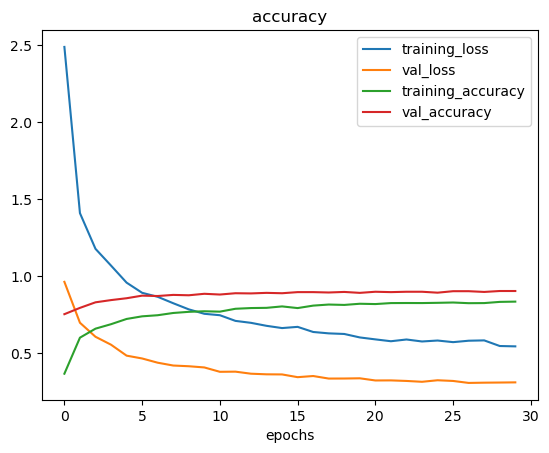

In [144]:
plot_loss_curves(history_3)

In [148]:
model_3.save("./Models/best_model.h5")

### Prediction on some images

In [152]:
# Load the saved model
loaded_model = tf.keras.models.load_model('./Models/best_model.h5')

In [156]:
# Load and preprocess a single image
img_path = '/Users/Supriya/Desktop/wisdom/Reduced_Dataset/prediction_images/01.jpeg'  
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction
predictions = loaded_model.predict(img_array)

# Decode and print the predicted class
predicted_class = np.argmax(predictions)
print(f"Predicted Class Index: {predicted_class}")
print(f"The image is of: {class_names[predicted_class]}")

1/1 [==============================] - 0s 88ms/step
Predicted Class Index: 0
The image is of: ALBERTS TOWHEE
